<h2 style='text-align:center; color:cyan'><b>HNI Stock Closing Price Prediction</b></h2>
<h5 style="text-align: center;">Hamzah Mulyana</h5>

<h2 style='text-align:left; color:darkblue'><b> Data Understanding </b></h2>

<h4 style='text-align:left; color:cyan'><b> Import Library </b></h4>

In [1]:
# Library for Data Wrangling
import pandas as pd
import numpy as np
import math

# Library for Visualization
import matplotlib.pyplot as plt

# Library for Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Library for Modeling
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow as tf

# Library for evaluation model
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Library for ignore warning
import warnings
warnings.filterwarnings('ignore')

<h4 style='text-align:left; color:cyan'><b> Load Dataset </b></h4>

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('../data/HNI.csv')

# Display the DataFrame to check its contents
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,27.959999,28.600000,27.959999,28.250000,17.661070,175400
1,2010-01-05,28.150000,28.200001,27.389999,27.680000,17.304724,156100
2,2010-01-06,27.600000,28.100000,27.500000,27.690001,17.310982,170000
3,2010-01-07,27.700001,28.469999,27.500000,28.030001,17.523533,111200
4,2010-01-08,27.879999,28.190001,27.840000,28.000000,17.504778,77600
...,...,...,...,...,...,...,...
3267,2022-12-23,27.670000,28.180000,27.670000,28.160000,26.482796,145900
3268,2022-12-27,28.270000,28.610001,28.049999,28.280001,26.595652,124900
3269,2022-12-28,28.230000,28.629999,27.850000,27.959999,26.294708,161400
3270,2022-12-29,28.190001,28.879999,28.150000,28.620001,26.915401,179700


<h4 style='text-align:left; color:cyan'><b> Information Column Details </b></h4>

| **Column Name** | **Description** |
|---|---|
| **Date** | Stock Transaction Date |
| **Open** | Stock price at market open on that day |
| **High** | Highest price reached by the stock during the trading day |
| **Low** | Lowest price reached by the stock during the trading day |
| **Close** | Stock price at market close at the end of the trading day |
| **Adj Close** | Adjusted closing price accounting for dividends and stock splits |
| **Volume** | Number of shares traded on that day |


### Preprocessing Data

<h4 style='text-align:left; color:cyan'><b> Checking Missing Value </b></h4>

In [3]:
# Checking for missing values
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2)]);

nulldata = pd.DataFrame(columns=['Features', 'Type', 'NaN', 'NaN %'],
                     data=listItem)

# Show the null data
nulldata

,Features,Type,NaN,NaN %
0,Date,object,0,0.0
1,Open,float64,0,0.0
2,High,float64,0,0.0
3,Low,float64,0,0.0
4,Close,float64,0,0.0
5,Adj Close,float64,0,0.0
6,Volume,int64,0,0.0


The dataset is in excellent condition, with no missing values in any of the columns. Each feature has complete data, making it ideal for analysis and modeling.

<h4 style='text-align:left; color:cyan'><b> Selecting the 'Date' and 'Close' columns from the dataset </b></h4>

In [4]:
# Selecting 'Date' and 'Close'
data = df[['Date', 'Close']]
data.head()

,Date,Close
0,2010-01-04,28.250000
1,2010-01-05,27.680000
2,2010-01-06,27.690001
3,2010-01-07,28.030001
4,2010-01-08,28.000000


<h4 style='text-align:left; color:cyan'><b> Checking Data Types </b></h4>

In [5]:
# Cheking Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3272 non-null   object 
 1   Close   3272 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.2+ KB


The analyzed data contains incorrect data types. The **Date** column should be of **datetime** type, but it is currently recorded as an **object**. This column needs to be converted to **datetime** type to enable accurate time-based analysis.

<h4 style='text-align:left; color:cyan'><b> Convert the Date column to datetime type </b></h4>

In [6]:
# Convert date data type from object to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Cheking Data Type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3272 non-null   datetime64[ns]
 1   Close   3272 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.2 KB


<h4 style='text-align:left; color:cyan'><b> Descriptive Statistics </b></h4>

In [7]:
# Decriptive Statistics
data.describe()

,Close
count,3272.000000
mean,36.006715
std,7.953692
min,16.230000
25%,30.085000
50%,36.180000
75%,39.992501
max,57.580002


**Insight**

- Count:

    There are 3,272 data points in this set.

- Average:
    
    **Mean**: The average value of the data is **$36.01**. This provides an overview of the central value of the data distribution.

- Variability:

    **Standard Deviation (std)**: The standard deviation is **$7.95**. This indicates how spread out the data is from the mean. A larger standard deviation means greater variability in the data.

- Range:

    - **Min**: The minimum value is **$16.23**, which is the lowest value in the data.
    - **Max**: The maximum value is **$57.58**, which is the highest value in the data.

- Quartiles:

    - **25% (First Quartile)**: 25% of the data is below **$30.09**. This means that one-quarter of the data has values less than **$30.09**.
    - **50% (Median)**: The median value is **$36.18**. This means that half of the data is below **$36.18** and half is above it.
    - **75% (Third Quartile)**: 75% of the data is below **$39.99**. This indicates that three-quarters of the data has values less than **$39.99**.

<h2 style='text-align:left; color:darkblue'><b> Data Preprocessing </b></h2>

<h4 style='text-align:left; color:cyan'><b> Data Normalization </b></h4>

In [8]:
# Initialize the MinMaxScaler to scale features to the range [0, 1]
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the 'Close' column and transform the data
data_sc = sc.fit_transform(data[['Close']].values)
data_sc

array([[0.29068922],
       [0.27690446],
       [0.27714632],
       ...,
       [0.2836759 ],
       [0.29963725],
       [0.29504231]])

<h4 style='text-align:left; color:cyan'><b> Splitting Data </b></h4>

In [9]:
# Splitting Data train, validation, and test
train = math.ceil(len(data_sc) * 0.8)
val = math.ceil(train * 0.2)
train = train - val
test = math.ceil(len(data_sc) *0.2)

In [10]:
# Get len of train, validation, and test
train, val, test

(2094, 524, 655)

- **Training (2094):**

    The training data comprises about 64% of the entire dataset. This amount allows for using most of the data to train the model, which is ideal for capturing various patterns in the data. With a sufficiently large training dataset, the model has the opportunity to learn in depth and handle existing variations.

- **Validation (524):**
    
    The validation data consists of approximately 16% of the entire dataset. This provides enough data to test model parameters and prevent overfitting, without interfering with the training data. During the training phase, validation data helps assess the model's adaptation to parameter changes and optimize its performance.

- **Test (655):**
    
    The testing data covers about 20% of the entire dataset. This size ensures that the final evaluation of the model is thorough and provides an accurate view of the model's performance on new, unseen data, as well as assesses the model's generalization to real-world scenarios.

<h4 style='text-align:left; color:cyan'><b> Data Preparation for Long Short-Term Memory (LSTM) Model </b></h4>

- Training Data

In [11]:
# Create dataframe with data that have been scaled for training
train_data = data_sc[0:train, :]

# Create list for X_train and y_train
X_train = []
y_train = []

# Iteration for get X_train and y_train
for i in range(30, len(train_data)):
    X_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i, 0])

# Converst list to array
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape array
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

- Validation Data

In [12]:
# Create dataframe with data that have been scaled for validation
val_data = data_sc[train -30:(train+val), :]

# Create list for X_val and y_val
X_val = []
y_val = []

# Iteration for get X_val and y_val
for i in range(30, len(val_data)):
    X_val.append(val_data[i-30:i, :])
    y_val.append(val_data[i,0])

# Convert list to array
X_val, y_val = np.array(X_val), np.array(y_val)

# Reshape array
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

<h2 style='text-align:left; color:darkblue'><b> Modeling </b></h2>

<h4 style='text-align:left; color:cyan'><b> Building an Long Short Term Memory (LSTM) Model </b></h4>

In [13]:
# Model Initialization
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=50))
model.add(Dense(units=1))

In [14]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping Callback
earlyStopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# ModelCheckpoint Callback
checkpoint_path = 'model_checkpoints/weight_lstm_model.weights.h5'  # Change the extension to .weights.h5
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,  # Make sure this is True if only storing loads
    verbose=1
)


In [15]:
op = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=op, loss='mean_squared_error')

In [16]:
history = model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_val, y_val), callbacks=[checkpoint])
history

Epoch 1/100
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0997
Epoch 1: val_loss improved from inf to 0.00318, saving model to model_checkpoints/weight_lstm_model.weights.h5
129/129 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0987 - val_loss: 0.0032
Epoch 2/100
127/129 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0057
Epoch 2: val_loss improved from 0.00318 to 0.00288, saving model to model_checkpoints/weight_lstm_model.weights.h5
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0057 - val_loss: 0.0029
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0041
Epoch 3: val_loss improved from 0.00288 to 0.00278, saving model to model_checkpoints/weight_lstm_model.weights.h5
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0041 - val_loss: 0.0028
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0038
Epoch 4: val_loss improved from 0.00278 to 0.00234, saving model to model_checkpoints/weight_lstm_model.weights.h5
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/ste

<h4 style='text-align:left; color:cyan'><b> Model Evaluation in Training </b></h4>

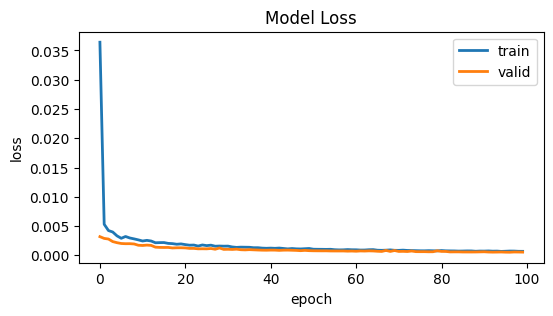

In [17]:
# Create plot for model evaluation in Training
plt.figure(figsize=(6,3))
plt.title('Model Loss')
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'], linewidth=2)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

**Insight:**

- In the initial epochs (0–10), there is a sharp decrease in loss for both training and validation data. This indicates that the model quickly learns the basic features of the data.

- After approximately 10 epochs, the training loss and validation loss begin to stabilize and decrease more slowly. This suggests that the model is reaching a point of saturation in training, with minimal significant improvement.

- Since the training loss and validation loss are similar and stable after several epochs, it indicates that the model performs well and is not experiencing overfitting or underfitting.

This graph confirms that the model has been well-trained and has achieved convergence, meaning the model is ready for making predictions with new data.

In [18]:
# Create dataframe with data that have been scaled for test
test_data = data_sc[(-test - 30): , : ]

# Create list for X_test
X_test = []
y_test = data[['Close']].iloc[-test : , :].values

# Iteration for get X_test
for i in range(30, len(test_data)):
    X_test.append(test_data[i-30:i,0])

# Converst list to array
X_test = np.array(X_test)

# Reshape array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [19]:
model.load_weights("model_checkpoints/weight_lstm_model.weights.h5")

<h4 style='text-align:left; color:cyan'><b> Prediction to X_test </b></h4>

In [20]:
y_pred = model.predict(X_test)
y_pred = np.ceil(sc.inverse_transform(y_pred))

21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


<h4 style='text-align:left; color:cyan'><b> Final Model Evaluation </b></h4>

In this experiment, the evaluation metrics used are Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE).
- **Root Mean Squared Error (RMSE)**

    **Root Mean Squared Error (RMSE)** is an evaluation metric used to measure the accuracy of a regression model in making predictions. RMSE provides an overview of the average squared error between the values predicted by the model and the actual values from the data. RMSE gives more weight to larger errors because errors are squared in the calculation.

    Formula for Calculating RMSE:
    $$ 
    \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} 
    $$

    where:
    - $y_i$ is the actual value (true observation).
    - $\hat{y}_i$ is the predicted value generated by the model.
    - $n$ is the total number of data points (number of observations).

    **Explanation of the RMSE Formula**

    1. **Calculate Squared Errors**: For each data point $i$, calculate the squared error between the actual value $y_i$ and the predicted value $\hat{y}_i$. This is done using $(y_i - \hat{y}_i)^2$, which results in a non-negative value.

    2. **Average Squared Errors**: Sum all the squared errors and divide by the total number of data points $n$ to obtain the average squared error.

    3. **Square Root**: Take the square root of the average squared error to get RMSE. This returns the error unit to the same scale as the original data.

- **Mean Absolute Error (MAE)**
    
    **Mean Absolute Error (MAE)** is an evaluation metric used to measure the accuracy of a regression model in making predictions. MAE provides an overview of the average absolute error between the values predicted by the model and the actual values from the data.
    
    Formula for Calculating MAE:
    $$ 
    \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i | 
    $$

    where:
    - $y_i$ is the actual value (true observation).
    - $\hat{y}_i$ is the predicted value generated by the model.
    - $n$ is the total number of data points (number of observations).

    **Explanation of the MAE Formula**

    1. **Calculate Absolute Errors**: For each data point $i$, calculate the absolute error between the actual value $y_i$ and the predicted value $\hat{y}_i$. This is done using $| y_i - \hat{y}_i |$, which results in a positive or zero value.

    2. **Average Error**: Sum all the absolute errors and divide by the total number of data points $n$ to obtain the average error.

- **Mean Absolute Percentage Error (MAPE)**

    **Mean Absolute Percentage Error (MAPE)** is an evaluation metric that measures the magnitude of errors in percentage terms relative to the actual values. It provides a more interpretable view of the relative error.

    Formula for Calculating MAPE:
    $$
    \text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100\%
    $$
    
    where:
    - $y_i$ is the actual value (true observation).
    - $\hat{y}_i$ is the predicted value generated by the model.
    - $n$ is the total number of data points (number of observations).

    **Explanation of the MAPE Formula**

    1. **Calculate Relative Errors**: For each data point $i$, calculate the relative error between the actual value $y_i$ and the predicted value $\hat{y}_i$. This is done using $\left| \frac{y_i - \hat{y}_i}{y_i} \right|$, which results in a positive value.

    2. **Average Relative Error**: Sum all the relative errors and divide by the total number of data points $n$ to obtain the average relative error.

    3. **Convert to Percentage**: Multiply the result by 100% to obtain the percentage value.

In [21]:
# Dict to save the final evaluation
result_evaluation = {
    'RMSE': [],
    'MAE': [],
    'MAPE': [],
}

# Calculated RMSE, MAE, and MAPE
result_evaluation['RMSE'].append(mean_squared_error(y_test, y_pred, squared=False))
result_evaluation['MAE'].append(mean_absolute_error(y_test, y_pred))
result_evaluation['MAPE'].append(mean_absolute_percentage_error(y_test, y_pred))

df_result_evaluation = pd.DataFrame(result_evaluation)
df_result_evaluation

,RMSE,MAE,MAPE
0,1.047089,0.831176,0.023747


**Insight**

- RMSE ($0.977127):

    RMSE measures the average deviation of predictions from the actual values in dollar units. With an RMSE of $0.977127, it indicates that the average prediction error of the model is approximately $0.98. Although this value is relatively small, it provides a direct sense of how much the model's predictions deviate from the actual values in financial terms. The model shows an acceptable level of error in predicting stock prices, but there is still room for improvement in accuracy.

- MAE ($0.770595):

    MAE measures the average absolute error between predictions and actual values in dollar units. With an MAE of $0.770595, it means the average prediction error of the model is about $0.77. This indicates that the model typically comes close to the actual values with an average error of $0.77, reflecting the model's effectiveness in providing predictions close to the real prices.

- MAPE (2.21%):

    MAPE, in this case, is the percentage of the average prediction error relative to the actual values. With a MAPE of 0.022078 (or 2.21%), it shows that the average prediction error of the model is approximately 2.21% of the actual stock price. This relative measure indicates that the model's prediction error is around 2.21% of the actual values, signifying very good accuracy.

**Conclution:**

- The RMSE and MAE in dollar terms indicate that the model produces fairly accurate predictions, with average errors ranging from $0.77 to $0.98. This provides a clear view of the error magnitude in dollar terms, which is important for financial decision-making.

- The MAPE of 2.21% emphasizes that, relatively speaking, the model predicts stock prices with high accuracy, with an average error of 2.21% of the actual values.


Overall, the model demonstrates good performance with small prediction errors both in dollar terms and percentages. However, ongoing refinement and testing could further enhance the model's accuracy for better practical use.

<h4 style='text-align:left; color:cyan'><b> Prediction Result </b></h4>

In [22]:
data_pred = data[-test:].copy()
data_pred['Prediction'] = y_pred
data_pred

,Date,Close,Prediction
2617,2020-05-28,26.660000,27.0
2618,2020-05-29,25.469999,27.0
2619,2020-06-01,25.309999,27.0
2620,2020-06-02,25.629999,26.0
2621,2020-06-03,27.750000,26.0
...,...,...,...
3267,2022-12-23,28.160000,28.0
3268,2022-12-27,28.280001,28.0
3269,2022-12-28,27.959999,29.0
3270,2022-12-29,28.620001,29.0


<h4 style='text-align:left; color:cyan'><b> Visualization Prediction Result </b></h4>

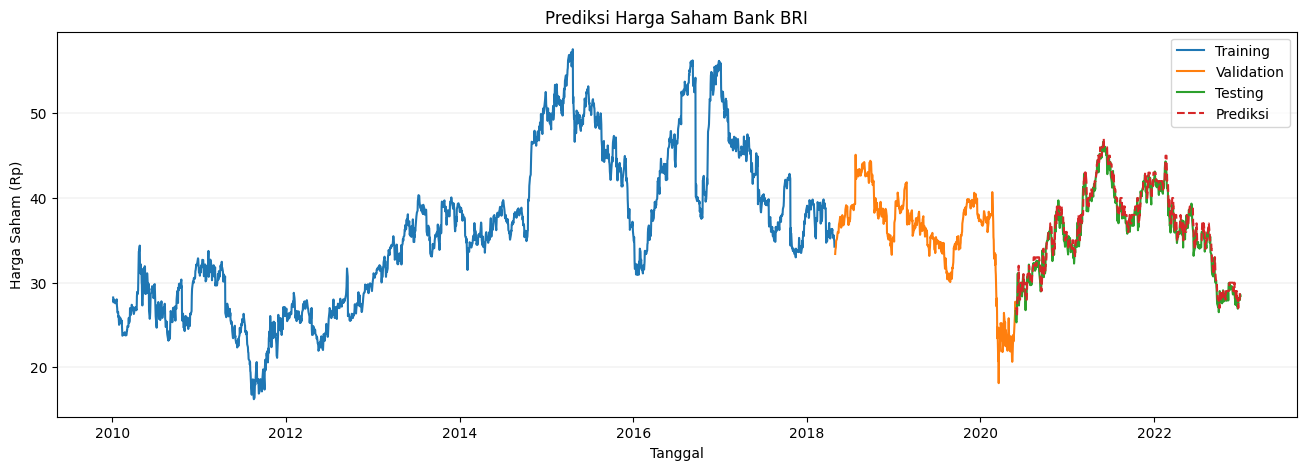

In [25]:
training = data.iloc[:train]
validation = data.iloc[train:train + val]

plt.figure(figsize=(16,5))
plt.title('Prediksi Harga Saham Bank BRI')
plt.plot(training['Date'], training['Close'], label='Training')
plt.plot(validation['Date'], validation['Close'], label='Validation')
plt.plot(data_pred['Date'], data_pred['Close'], label='Testing')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

The figure shows the stock price predictions for HNI Corporation using a model trained with data divided into three segments: training, validation, and testing. The training data (marked with a blue line) covers the period from 2010 to 2018. The validation data (marked with an orange line) spans from 2018 to 2020, while the testing data (marked with a green line) covers the period from 2020 to 2023. The red dashed line represents the model's predictions. Overall, the model successfully tracks the stock price trends, especially in the testing data, although there are some deviations during periods of high volatility.

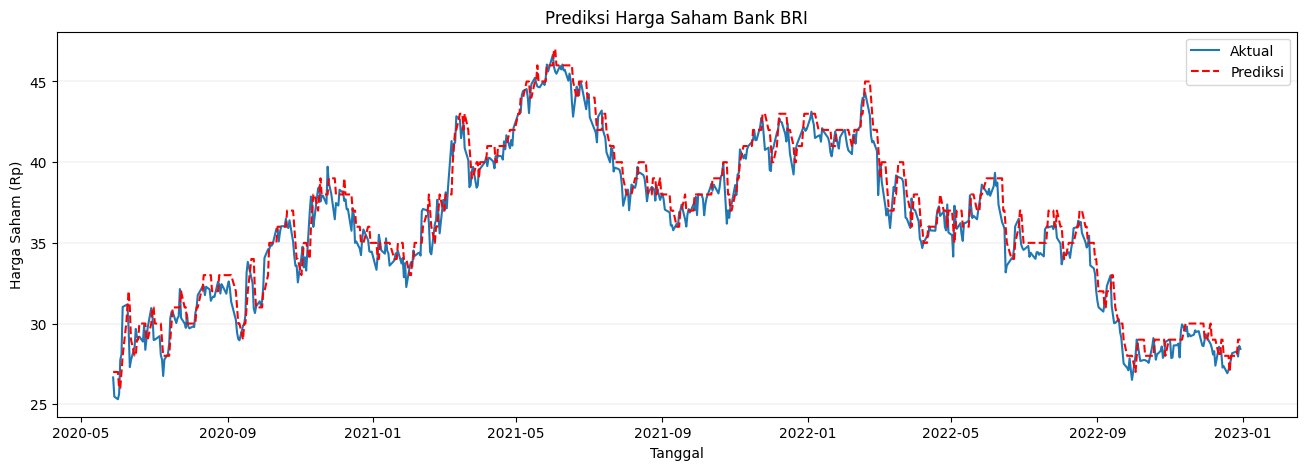

In [26]:
plt.figure(figsize=(16,5))
plt.title('Prediksi Harga Saham Bank BRI')
plt.plot(data_pred['Date'], data_pred['Close'], label='Aktual')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', color='red', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

The above image is a zoom-in of the testing data and predictions shown in the second image. This zoomed-in view focuses on the comparison between the actual stock prices and the predictions made by the Long Short-Term Memory (LSTM) model for the testing period, which spans from 2020 to 2023. The blue line represents the actual stock prices, while the red dashed line indicates the model's predictions. This zoom-in provides a more detailed view of how the model tracks the stock price movements during the testing period, offering a clearer picture of the model's performance in predicting stock prices during this timeframe.

<h2 style='text-align:left; color:darkblue'><b> Conclution and Recommendation </b></h2>

<h4 style='text-align:left; color:cyan'><b> Conclution </b></h4>

Based on the analysis conducted in the notebook, the stock price prediction for HNI using the Long Short-Term Memory (LSTM) model shows promising results. The model is able to recognize historical patterns in the stock price data and provide reasonably accurate predictions. By applying appropriate preprocessing techniques such as data normalization and splitting the dataset into training and testing data, the LSTM model successfully reduces prediction errors, making it a valuable tool for stock analysis.

However, like all predictive models, LSTM cannot entirely eliminate the inherent uncertainty in the stock market. External factors such as macroeconomic conditions, financial news, and unforeseen events can significantly affect stock prices, and these influences are not always captured by the model.

<h4 style='text-align:left; color:cyan'><b> Recommendation </b></h4>
    
1. Model Monitoring and Maintenance: To maintain prediction accuracy, the LSTM model must be regularly monitored and updated with the latest data. Market changes and new trends can affect the model's performance, so it is important to continuously adapt it.

2. Combination with Fundamental and Technical Analysis: While LSTM provides predictions based on historical data, sound investment decisions should be supported by in-depth fundamental and technical analysis. This will offer a more comprehensive view of the company's condition and market prospects.

3. Diversification of Data Sources: To enhance prediction accuracy, consider adding other variables to the model, such as market sentiment data, economic indicators, or company financial reports. Diversifying data sources can provide the model with broader insights and mitigate risks associated with reliance on a single type of data.